# Employee Attrition Analysis using PCA

Employees are the backbone of the organisation. An organisation's performance is heavily based on the quality of the employees. Challenges that an organisation has to face due employee attrition (employees voluntarily leaving their jobs) are:

1. Expenses in terms of both money and time to train new employees.
2. Loss of experienced employees
3. Negative impacts on productivity and profit

We obtained data from the HR department of a large corporate organisation regarding employees who voluntarily left their jobs, and compiled a dataset comprising 19 features.

### Dataset Features
Age, BusinessTravel, Department, DistanceFromHome, Education, EducationField, Sex, JobLevel, JobRole, MaritalStatus, MonthlyIncome, Over18, OverTime, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole,
YearsSinceLastPromotion, YearsWithCurrManager

### Business Questions

1. What factors are contributing to employee attrition?
2. What type of measures should the company take in order to retain their employees?



## Preparing the Data for PCA

In [20]:
# For Colab users
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Read in data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Employee-Attrition.csv')
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Sex,JobLevel,JobRole,MaritalStatus,MonthlyIncome,Over18,OverTime,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,1,2,Life Sciences,Female,2,Sales Executive,Single,5993,Y,Yes,8,0,6,4,0,5
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,Male,2,Research Scientist,Married,5130,Y,No,10,3,10,7,1,7
2,37,Travel_Rarely,Research & Development,2,2,Other,Male,1,Laboratory Technician,Single,2090,Y,Yes,7,3,0,0,0,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,Female,1,Research Scientist,Married,2909,Y,Yes,8,3,8,7,3,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,Male,1,Laboratory Technician,Married,3468,Y,No,6,3,2,2,2,2


In [23]:
# Checking for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   Sex                      1470 non-null   object
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   MaritalStatus            1470 non-null   object
 10  MonthlyIncome            1470 non-null   int64 
 11  Over18                   1470 non-null   object
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  TrainingTimesLastYear    1470 non-null  

PCA is primarily designed for numerical data, and applying it directly to categorical data is not straightforward because PCA relies on the computation of distances and variances, which are not directly meaningful for categorical variables. So, we will drop the non-numeric columns.

In [24]:
# Drop columns with 'object' data type i.e., the non-numeric ones
df.drop(columns = df.select_dtypes(include = ['object']).columns, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DistanceFromHome         1470 non-null   int64
 2   Education                1470 non-null   int64
 3   JobLevel                 1470 non-null   int64
 4   MonthlyIncome            1470 non-null   int64
 5   TotalWorkingYears        1470 non-null   int64
 6   TrainingTimesLastYear    1470 non-null   int64
 7   YearsAtCompany           1470 non-null   int64
 8   YearsInCurrentRole       1470 non-null   int64
 9   YearsSinceLastPromotion  1470 non-null   int64
 10  YearsWithCurrManager     1470 non-null   int64
dtypes: int64(11)
memory usage: 126.5 KB


In [25]:
# We are left with 11 numeric variables
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.063946,6502.931293,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.106940,4707.956783,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,19999.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [26]:
# Scale Data, PCA must be performed on standardised data
df_scaled = StandardScaler().fit_transform(df)

## Scree Plot

A Scree plot is a plot of the eigenvalues or the % of explained variance  in descending order. It helps us determine the number of principal components to retain. For our given problem, we can create up to 11 PCs.


In [27]:
# Perform PCA on Scaled Data
pca_all = PCA()
pca_features = pca_all.fit_transform(df_scaled)

In [28]:
#The amount of variance that each PC explains
var = pca_all.explained_variance_ratio_
var_percentages = var * 100 # To express them as percentages

# Format to 1 dp
var_formatted = [f"{v:.1f}%" for v in var_percentages]
var_formatted

['42.2%',
 '14.0%',
 '9.6%',
 '8.9%',
 '8.7%',
 '5.4%',
 '4.9%',
 '2.6%',
 '1.9%',
 '1.4%',
 '0.4%']

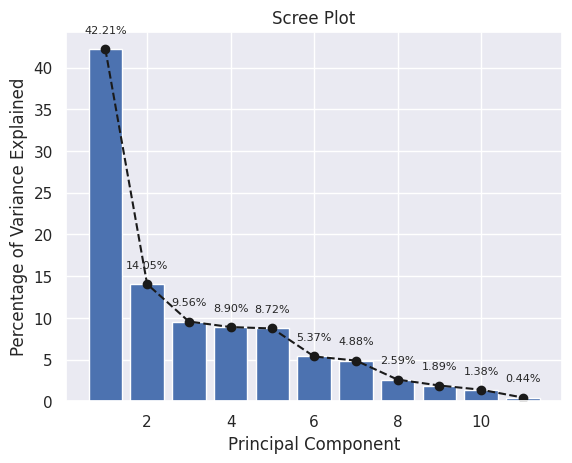

In [29]:
# Instead of starting the x component from 0, start from PC 1 and so on
PC_values = np.arange(pca_all.n_components_) + 1
sns.set_theme()
plt.plot(PC_values, var*100, 'o--', color = 'k')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
ax = plt.bar(range(1,len(var)+1),var*100)
plt.bar_label(ax, fmt = '{:,.2f}%', padding = 10, fontsize = 8)
plt.show()

In [30]:
print('The first 3 PCs account for '+ str((var[0] + var[1] + var[2])*100) + '% of the explained variance')
print('The first 5 PCs account for '+ str((var[0] + var[1] + var[2] + var[3] + var[4])*100) + '% of the explained variance')

The first 3 PCs account for 65.81972448848123% of the explained variance
The first 5 PCs account for 83.44267488531686% of the explained variance


From the 4th PC (after the elbow point) we see that our scree plot starts to flatten. We can choose to retain only the first 3 PCs.

# Ranking Employees

If I asked you to rank the employees based on their monthly income, this would be straight forward. You would ignore all other features and arrange the employees according to the MonthlyIncome variable in asceding or descending order. This is because ranking in one dimension is easy.

\\

If I asked you to rank the employees in our dataset based on **all** 11 numeric features, this would be more challenging. One approach could be to assign a score to each employee for each feature, and then calculate the average of these scores. Subsequently, you could rank the employees based on these average scores. This is a sound approach, but it has the following disadvantages:

1. Simply averaging features ignores any correlations between them. This can lead to misleading results if some features are highly correlated or if they contribute unevenly to the overall data structure.
2. The mean treats all features equally. Averaging treats all features equally, which can dilute the impact of more important features and exaggerate the impact of less important ones.
3. The mean includes all data points, including noise, which can lead to less robust and less reliable rankings.

\\

PCA takes care of all of the problems listed above. If we bring our dataset to one-dimension (i.e., we work with only the first PC) we will be able to rank our employees while taking into consideration correlations, feature importance and noise reduction.

In [31]:
# Perform PCA on Scaled Data, setting n_components to 1
pca = PCA(n_components = 1)
pca_features = pca.fit_transform(df_scaled)

# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[ 0.27385307,  0.00467259,  0.07637481,  0.38196261,  0.37382525,
         0.40193455, -0.01081253,  0.39487138,  0.33898024,  0.2993649 ,
         0.33375163]])

The loadings indicate the contribution of each original feature to the variance explained by each principal component. PCs are derived as weighted sums of the original features, where the weights are given by the loadings. So according to the loadings above, we can write out the expression of PC1 as:

\\

PC1 = (0.27385307 x Age) + (0.00467259 x DistanceFromHome) + (0.07637481 x Education) + (0.38196261 x JobLevel) + (0.37382525 x MonthlyIncome) + (0.40193455 x TotalWorkingYears) − (0.01081253 x TrainingTimesLastYear) + (0.39487138 x YearsAtCompany) + (0.33898024 x YearsInCurrentRole) + (0.2993649 x YearsSinceLastPromotion) + (0.33375163 x YearsWithCurrManager)

We will now obtain the first principal component scores which are the projections of our original data points onto the first principal component. This effectively brings us into 1 dimension that we can use to rank observations.

In [32]:
# Extract the first principal component scores for our observations
pc1 = pca_features[:, 0]
pc1

array([-0.36687812,  0.6308356 , -2.4473459 , ..., -1.17620939,
        1.0015189 , -1.16320273])

In [33]:
# Create a DataFrame to store the original data along with PC1 scores and ranks
# Created separate df for ranking purposes only
ranked_data = df.copy()

# Add 'PC1 Score' column with first PC scores for observations
ranked_data['PC1 Score'] = pc1
ranked_data['Rank'] = ranked_data['PC1 Score'].rank(ascending=False) # Rank in desceding order

# Check the additional two columns for PC score and rank
ranked_data.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PC1 Score,Rank
0,41,1,2,2,5993,8,0,6,4,0,5,-0.366878,705.0
1,49,8,1,2,5130,10,3,10,7,1,7,0.630836,483.0
2,37,2,2,1,2090,7,3,0,0,0,0,-2.447346,1352.0
3,33,3,4,1,2909,8,3,8,7,3,0,-0.851059,847.0
4,27,2,1,1,3468,6,3,2,2,2,2,-2.074905,1275.0


In [34]:
# Sort the DataFrame by rank
ranked_data = ranked_data.sort_values('Rank')
ranked_data

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PC1 Score,Rank
595,58,2,4,5,19246,40,2,31,15,13,8,8.147918,1.0
190,52,1,4,5,19999,34,5,33,18,11,9,8.009439,2.0
237,52,2,4,5,19068,33,2,33,7,15,12,7.532485,3.0
123,51,6,3,5,19537,23,5,20,18,15,15,7.397584,4.0
270,55,1,3,5,19045,37,2,36,10,4,13,7.297661,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,21,15,2,1,1232,0,6,0,0,0,0,-3.374693,1466.0
1153,18,3,2,1,1569,0,2,0,0,0,0,-3.411248,1467.0
127,19,22,1,1,1675,0,2,0,0,0,0,-3.436485,1468.0
828,18,8,1,1,1904,0,0,0,0,0,0,-3.439576,1469.0


We have sucessfully ranked all our employees on all 11 features while taking into consideration correlations, feature importance and noise reduction. This is a more reliable and robust ranking of our employees.

\\

The employee with index position 595 ranks the highest across our features i.e., they are one of the oldest in age, one of the most experienced regarding years worked at the company, one of the highest earning employees in terms of monthly income, etc. On the other hand, the employee at index 727 ranks the lowest across all our features.

# Creating a Biplot

We want to create a scatterplot of our observations. Of course, this will be very challenging to do with all 11 features, so we will project our observations onto a 2-dimensional space defined by the first two PCs to create a biplot.

In [35]:
# Perform PCA on Scaled Data
pca = PCA(n_components=2) # Setting n_components to 2 for two PCs
pca_features = pca.fit_transform(df_scaled)

# Principal components correlation coefficients i.e., loadings/weights
loadings = pca.components_

# Creating some necessary variables
# Number of features before PCA
n_features = pca.n_features_in_

# Feature names
feature_names = df.columns.tolist()

# PC names
pc_list = ['PC1', 'PC2']

# Match PC names to loadings and store in dictionary
pc_loadings = dict(zip(pc_list, loadings))
pc_loadings

{'PC1': array([ 0.27385307,  0.00467259,  0.07637481,  0.38196261,  0.37382525,
         0.40193455, -0.01081253,  0.39487138,  0.33898024,  0.2993649 ,
         0.33375163]),
 'PC2': array([ 0.40822822, -0.03110124,  0.18287231,  0.32370054,  0.33984219,
         0.25832714, -0.05571154, -0.29338474, -0.39973683, -0.31572506,
        -0.404082  ])}

According to the loadings given above, we have the following expressions for our first 2 PCs:

\\

PC1 = (0.27385307×Age) + (0.00467259×DistanceFromHome) + (0.07637481×Education) + (0.38196261×JobLevel) + (0.37382525×MonthlyIncome) + (0.40193455×TotalWorkingYears) − (0.01081253×TrainingTimesLastYear) + (0.39487138×YearsAtCompany)+(0.33898024×YearsInCurrentRole) + (0.2993649×YearsSinceLastPromotion) + (0.33375163×YearsWithCurrManager)

\\

PC2 = (0.40822822×Age) − (0.03110124×DistanceFromHome) + (0.18287231×Education) + (0.32370054×JobLevel)+(0.33984219×MonthlyIncome) + (0.25832714×TotalWorkingYears) − (0.05571154×TrainingTimesLastYear) − (0.29338474×YearsAtCompany) − (0.39973683×YearsInCurrentRole) − (0.31572506×YearsSinceLastPromotion) − (0.404082×YearsWithCurrManager)

The code that follows creates a biplot. It is very similar to the steps we followed when we performed PCA on the Iris dataset and created a biplot.

Text(0.5, 1.0, 'PCA Biplot of Employee Attrition dataset')

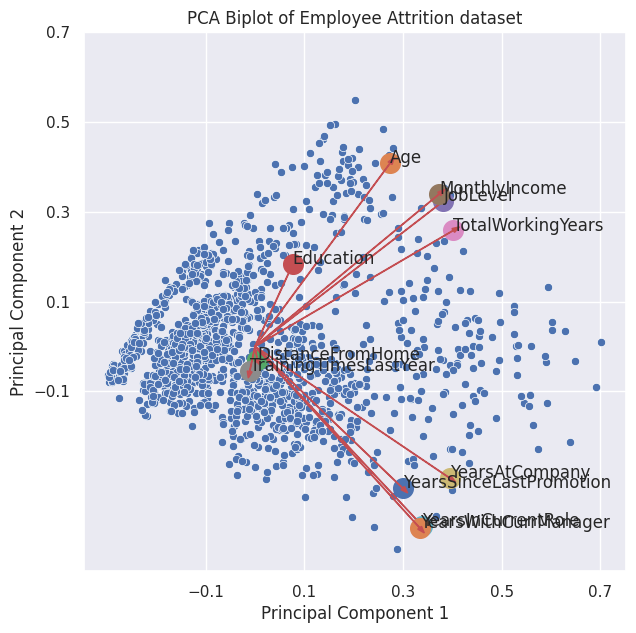

In [37]:
# Get the loadings of x (PC1) and y (PC2) axes
xs = loadings[0] # for PC1
ys = loadings[1] # for PC2


# Create pca_df DataFrame containing coordinates in PC space
pca_df = pd.DataFrame(
    data = pca_features,  # We obtained pca_features when we applied pca.fit_transform(x_scaled)
    columns = ['PC1', 'PC2'])

# Ensure that PC1 and PC2 are on a comparable scale by scaling pca_df
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Adjust biplot figure size dimensions
plt.figure(figsize = (7, 7))

# Scatterplot of our original data points in the PC space using scaled coords in PC space
sns.scatterplot(
    x = 'PC1',
    y = 'PC2',
    data = pca_df_scaled
    )

# Adding vector representations of our loadings to the plot i.e., arrows from origin to feature loadings in PC space
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s = 200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color = 'r',
        head_width = 0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Refining visualisation by adjusting axes spacing, adding axes labels and a title
xticks = np.linspace(-0.1, 0.7, num = 5)
yticks = np.linspace(-0.1, 0.7, num = 5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Biplot of Employee Attrition dataset')

There are many observations we can make using the biplot above. We will start with the sizes of our vectors:
*    The TrainingTimesLastYear and DistanceFromHome vectors are small, indicating these features have less influence or explain less variance compared to features with larger vectors.
*    The features with large vectors (such as Age, YearsWithCurrManager and YearsInCurrentRole) are more important in distinguishing between samples along the principal component axes.

\\

Now we will discuss feature correlations:
*   Acute angles between YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, and YearsInCurrentRole indicate these features are correlated.
*   Small angles between Age, MonthlyIncome, JobLevel, and TotalWorkingYears also show correlation.
*   Right angles, such as between Age and YearsAtCompany, indicate no correlation.

\\

Finally, let us discuss the distribution of our observations:
*   Observations are sparsely distributed further to the right from the origin, meaning fewer employees who have extreme values on vectors in this direction leave voluntarily.
*   Majority of observations are clustered around the origin, meaning many employees who leave voluntarily have lower monthly incomes, fewer years at the company, are younger, etc.
*   The cluster in the opposite direction of the YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, and YearsInCurrentRole vectors (to the left of the origin) indicates a negative correlation with these features. This suggests that many employees who leave tend to have shorter tenures, fewer promotions, and shorter periods with their current manager and in their current role. We can say the same for the clusters of observations in the opposite direction of our Age, MonthlyIncome, JobLevel, and TotalWorkingYears vectors.


# Combining the Ranking Results and Biplot

When we ranked our employees, we highlighted that the employee with index position 595 ranks the highest across our features and the employee at index 727 ranks the lowest across all our features. Let's see where these employees are positioned in the bipot.

\\

*(The code below is exactly what we used in the above biplot, with the addition of if-statements that identify employees at index 727 and index 595.)*

Text(0.5, 1.0, 'PCA Biplot of Employee Attrition dataset')

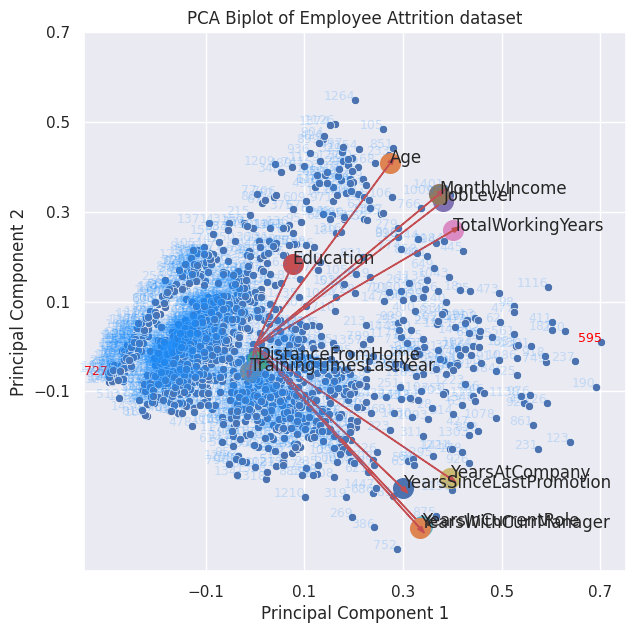

In [38]:
plt.figure(figsize = (7, 7))

# Scatterplot of our original data points in the PC space
sns.scatterplot(
    x = 'PC1',
    y = 'PC2',
    data = pca_df_scaled
    )

# Annotate each point with its index and make index 595 and 727 red
for i in range(pca_df_scaled.shape[0]):
    if i == 595 or i == 727:
        plt.text(pca_df_scaled['PC1'][i], pca_df_scaled['PC2'][i], str(i),
                 fontsize = 9, ha = 'right', color = 'red')
    else:
        plt.text(pca_df_scaled['PC1'][i], pca_df_scaled['PC2'][i], str(i),
                 fontsize = 9, ha = 'right', color = 'dodgerblue', alpha = 0.2) # Making the index labels for all other obs more transparent by adjusting the alpha parameter

# Adding vector representations of our loadings to the plot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s = 200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color = 'r',
        head_width = 0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Refining visualisation with spacing, axes labels and a title
xticks = np.linspace(-0.1, 0.7, num = 5)
yticks = np.linspace(-0.1, 0.7, num = 5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Biplot of Employee Attrition dataset')

Notice that they are both plotted on the extreme ends of a biplot space. We can use their relative positings to say:

* Employee 595 has had a long tenure, a lot of promotions, a long period with their current manager and in their current role, high income, long working hours and a high job level (just as we concluded when we ranked them).
* Employee 727 has had a short tenure, few recent promotions, a short period with their current manager and in their current role, low income, fewer working hours and a low job level (again, just as we concluded when we ranked them).



# Answering Business Questions Based on PCA Results

### What factors are contributing to employee attrition?
* Employees with lower income, lower job levels, and potentially fewer working hours are more prone to attrition (such as Employee 727, who is part of a large cluster of observations).
* Older employees (represented by the Age vector) and those with higher total working years tend to have lower attrition rates, possibly due to their experience and stability in the organisation.
* Employees with longer tenures, frequent promotions, and longer periods with their current manager and in their current role (as indicated by their positions in the biplot) tend to have lower attrition rates.


### What type of measures should the company take in order to retain their employees?

* The organisation needs to critically assess career development opportunities to incentivise new recruits to stay, since they are more likely to leave.
* Since employees earning lower salaries appear to have a higher likelihood of leaving, the organisation needs to implement or revise their reward systems. They should also ensure compensation and benefits packages are competitive and reflect employees' skills and responsibilities.
* Offer incentives to retain older and more experienced employees, since a considerable amount of them also leave voluntarily.

\\

**Important note:** The suggestions above are only preliminary. They could (and should) be backed by data and further analysis e.g., information regarding how competitive the company's compensation packages are, employee satifaction scores, career progression statistics, etc.

# Further Exploration
Think of PCA as an exploratory process. We can use Machine Learning to create models that can identify employees at risk of attrition early, which can help the organisation plan initiatives to intervene. Think about how you could build such a model.
